In [271]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
import pandas as pd
import numpy as np

# Load Dataset

In [272]:
dataset = arff.loadarff('dataset_31_credit-g.arff')
df = pd.DataFrame(dataset[0])

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype(str)
df

checking_status  duration                  credit_history   
0                <0       6.0  critical/other existing credit  \
1          0<=X<200      48.0                   existing paid   
2       no checking      12.0  critical/other existing credit   
3                <0      42.0                   existing paid   
4                <0      24.0              delayed previously   
..              ...       ...                             ...   
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment   
0               radio/tv         1169.0  no known savings         >=7  \
1               radio/tv         5951.0              <100      1<=X<4   
2              education         2096.0              <100      4<=X<7   
3    furniture/equipment         7882.0              <100      4<=X<7   
4                new car         4870.0              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment         1736.0              <100      4<=X<7   
996             used car         3857.0              <100      1<=X<4   
997             radio/tv          804.0              <100         >=7   
998             radio/tv         1845.0              <100      1<=X<4   
999             used car         4576.0        100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...   
0                       4.0         male single          none  ...  \
1                       2.0  female div/dep/mar          none  ...   
2                       2.0         male single          none  ...   
3                       2.0         male single     guarantor  ...   
4                       3.0         male single          none  ...   
..                      ...                 ...           ...  ...   
995                     3.0  female div/dep/mar          none  ...   
996                     4.0        male div/sep          none  ...   
997                     4.0         male single          none  ...   
998                     4.0         male single          none  ...   
999                     3.0         male single          none  ...   

     property_magnitude   age  other_payment_plans   housing existing_credits   
0           real estate  67.0                 none       own              2.0  \
1           real estate  22.0                 none       own              1.0   
2           real estate  49.0                 none       own              1.0   
3        life insurance  45.0                 none  for free              1.0   
4     no known property  53.0                 none  for free              2.0   
..                  ...   ...                  ...       ...              ...   
995         real estate  31.0                 none       own              1.0   
996      life insurance  40.0                 none       own              1.0   
997                 car  38.0                 none       own              1.0   
998   no known property  23.0                 none  for free              1.0   
999                 car  27.0                 none       own              1.0   

                           job num_dependents  own_telephone foreign_worker   
0                      skilled            1.0            yes            yes  \
1                      skilled            1.0           none            yes   
2           unskilled resident            2.0           none            yes   
3                      skilled            2.0           none            yes   
4                      skilled            2.0           none            yes   
..                         ...            ...            .

# Data Preprocessing dan Exploratory Data Analysis

- ## Memeriksa missing values, tipe data,  dan statistik pada kolom / variable numerik di dalam dataset

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [274]:
df.describe()

duration  credit_amount  installment_commitment  residence_since   
count  1000.000000    1000.000000             1000.000000      1000.000000  \
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

- ## Memeriksa Distribusi dan Outliers pada kolom / variable numerik

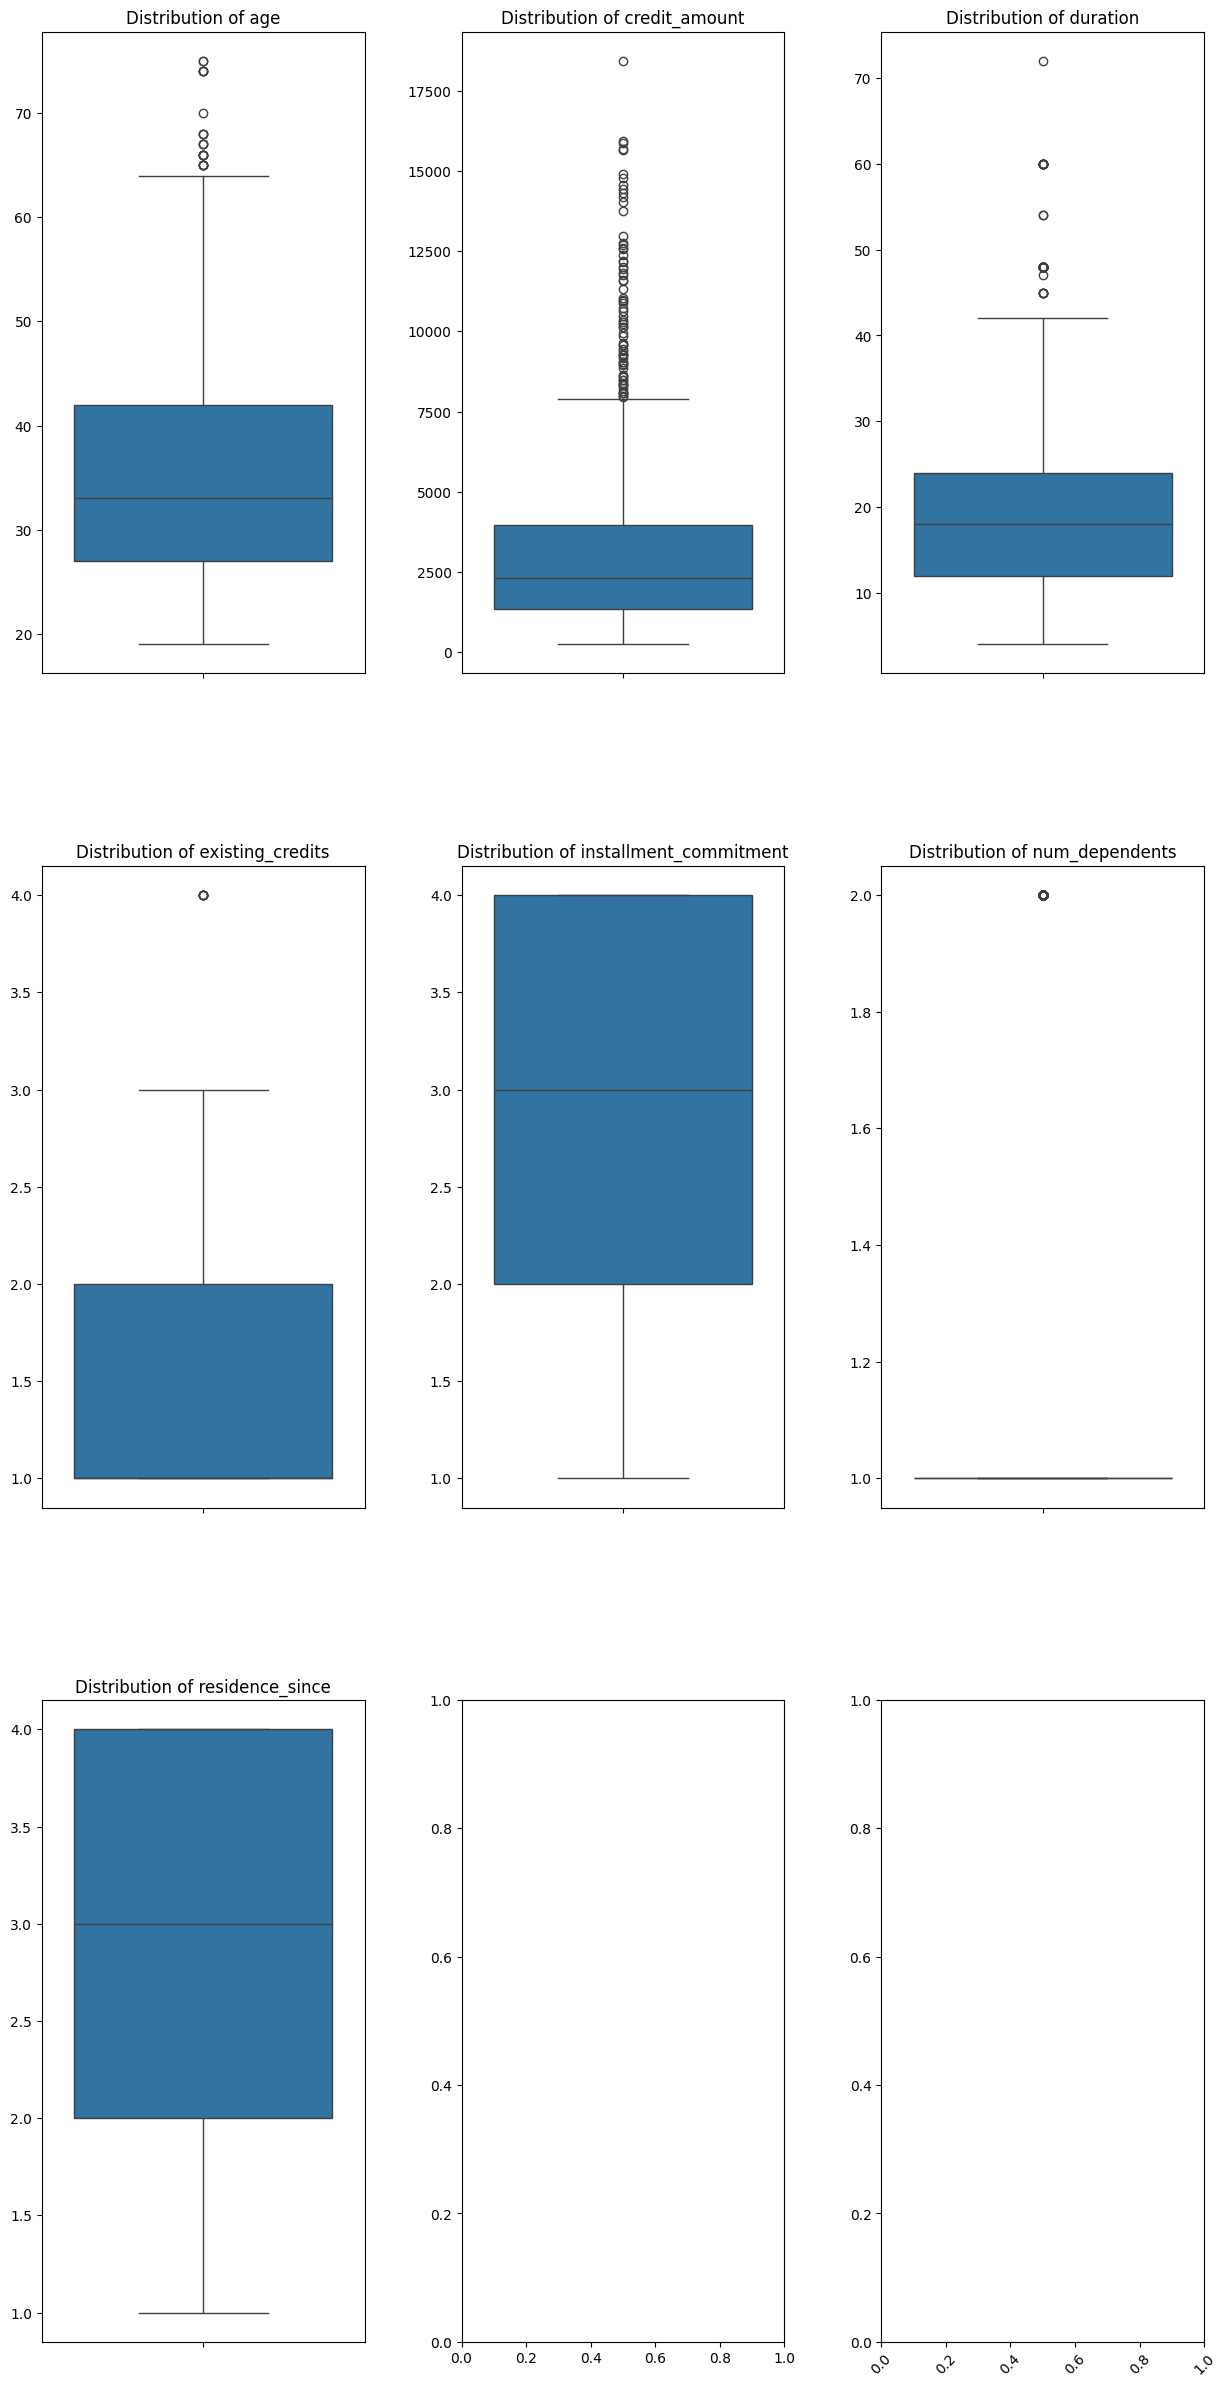

In [275]:
fig, axes = plt.subplots(3, 3, figsize=(15, 30))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.columns.difference(categorical_cols), axes)):
    plt.xticks(rotation=45)
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.3, hspace=0.3)


- ## Clip Outlier

Berdasarkan gambar di atas, dapat dinyatakan bahwa terdapat outlier pada beberapa variable numerik. Sehingga, kita perlu melakukan menghapus outliers yang terdapat di dalam dataset tersebut. Penghapusan outlier dilakukan dengan menggunakan teknik IQR (Interquartile Range) untuk mengidentifikasi keberadaan outlier

In [276]:
def clip_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    
    return df_filtered

df = clip_outliers(df,df.columns.difference(categorical_cols))

- ## Encoding

Pada kasus ini, teknik encoding yang digunakan untuk seluruh data kategorikal adalah Label Encoding

In [277]:
encoder = LabelEncoder()
for i in categorical_cols:
    df[i] = encoder.fit_transform(df[i])

df

C:\Users\jayaw\AppData\Local\Temp\ipykernel_26068\3855683718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = encoder.fit_transform(df[i])
C:\Users\jayaw\AppData\Local\Temp\ipykernel_26068\3855683718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = encoder.fit_transform(df[i])
C:\Users\jayaw\AppData\Local\Temp\ipykernel_26068\3855683718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

checking_status  duration  credit_history  purpose  credit_amount   
6                  3      24.0               3        3         2835.0  \
7                  0      36.0               3        9         6948.0   
8                  3      12.0               3        6         3059.0   
9                  0      30.0               1        4         5234.0   
10                 0      12.0               3        4         1295.0   
..               ...       ...             ...      ...            ...   
993                1      36.0               3        3         3959.0   
994                3      12.0               3        4         2390.0   
995                3      12.0               3        3         1736.0   
996                1      30.0               3        9         3857.0   
997                3      12.0               3        6          804.0   

     savings_status  employment  installment_commitment  personal_status   
6                 1           3                     3.0                3  \
7                 2           0                     2.0                3   
8                 3           1                     2.0                1   
9                 2           4                     4.0                2   
10                2           2                     3.0                0   
..              ...         ...                     ...              ...   
993               2           4                     4.0                3   
994               4           3                     4.0                3   
995               2           1                     3.0                0   
996               2           0                     4.0                1   
997               2           3                     4.0                3   

     other_parties  ...  property_magnitude   age  other_payment_plans   
6                2  ...                   1  53.0                    1  \
7                2  ...                   0  35.0                    1   
8                2  ...                   3  61.0                    1   
9                2  ...                   0  28.0                    1   
10               2  ...                   0  25.0                    1   
..             ...  ...                 ...   ...                  ...   
993              2  ...                   1  30.0                    1   
994              2  ...                   0  50.0                    1   
995              2  ...                   3  31.0                    1   
996              2  ...                   1  40.0                    1   
997              2  ...                   0  38.0                    1   

     housing  existing_credits  job  num_dependents  own_telephone   
6          1               1.0    1             1.0              0  \
7          2               1.0    0             1.0              1   
8          1               1.0    3             1.0              0   
9          1               2.0    0             1.0              0   
10         2               1.0    1             1.0              0   
..       ...               ...  ...             ...            ...   
993        1               1.0    0             1.0              1   
994        1               1.0    1             1.0              1   
995        1               1.0    3             1.0              0   
996        1               1.0    0             1.0              1   
997        1               1.0    1             1.0              0   

     foreign_worker  class  
6                 1      1  
7                 1      1  
8                 1      1  
9                 1      0  
10                1      0  
..              ...    ...  
993               1      1  
994               1      1  
995               1      1  
996               1      1  
997               1      1  

[728 rows x 21 columns]

# Pelatihan Model

Pada kasus ini, model yang digunakan adalah  Logistic Regression, Naive Bayes, KNN (K-Nearest Neighbor), SVM (Support Vector Machines), Random Forest, dan XGBoost. Dari model- model tersebut, akan dipilih model yang menghasilkan score tertinggi.

Pada proses pelatihan akan dilakukan Hyperparameter tuning dengan menggunakan metode GridSearchCV sehingga akan didapatkan kombinasi hyperparameter yang terbaik (menghasilkan score tertinggi). Pada setiap kombinasi hyperparameter, akan dilakukan stratified 5-fold cross validation agar estimasi / score yang dihasilkan lebih akurat saat dibandingkan dengan model lainnya.

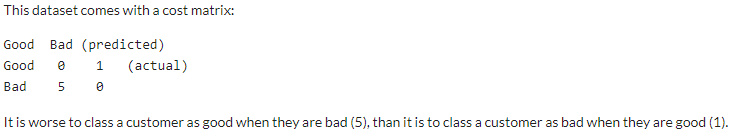

Pada gambar di atas, dapat dinyatakan bahwa pada kasus ini, seseorang dengan class 'bad' yang diklasifikasikan sebagai 'good' oleh model (false positive) memiliki pengaruh / konsekuensi yang lebih besar (cost = 5) daripada seseorang dengan class 'good' yang diklasifikasikan sebagai 'bad' (false negative) (cost = 1). Sehingga, kita perlu menggunakan metric scoring yang dapat meminimalisir adanya false positive. Salah satu metric yang dapat digunakan pada kasus ini adalah precision. Precision mengukur seberapa banyak dari prediksi positif yang benar dari semua prediksi positif yang dilakukan oleh model. Berikut ini adalah formula untuk menghitung precision pada sebuah model:

`Precision = True Positives / (True Positives + False Positives)`

In [278]:
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [279]:
models = [
    {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        },
        'name': 'Logistic Regression'
    },
    {
        'model': MultinomialNB(),
        'params': {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
        'name': 'Multinomial Naive Bayes'
    },
    {
        'model': GaussianNB(),
        'params': {},
        'name': 'Gaussian Naive Bayes'
    },
    {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'], 
            'metric': ['euclidean', 'manhattan'],
        },
        'name': 'K-Nearest Neighbor'
    },
    {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 20], 
            'min_samples_split': [2, 5, 10], 
            'min_samples_leaf': [1, 2, 4],  
            'max_features': ['sqrt', 'log2', None]
        },
        'name': 'Decision Tree'
    },
    {
        'model': SVC(),
        'params': {},
        'name': 'Support Vector Machines'
    },
    {
        'model': RandomForestClassifier(),
        'params':  {
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 5, 10, 20], 
        },
        'name': 'Random Forest'
    },
    {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
        },
        'name': 'XGBoost'
    }
]

In [280]:
for i in models:
    grid_search = GridSearchCV(i['model'],param_grid=i['params'],cv=skf,scoring='precision',error_score='raise')
    grid_search.fit(df.iloc[:,:-1].values, df.iloc[:, -1].values)
    results.append((i['name'],grid_search.best_score_,grid_search.best_params_,grid_search.best_estimator_))
    print(i['name'],'v')

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression v
Multinomial Naive Bayes v
Gaussian Naive Bayes v
K-Nearest Neighbor v
Decision Tree v
Support Vector Machines v
Random Forest v
XGBoost v


In [281]:
results = pd.DataFrame(results, columns=['Name','Score','Best Params', 'Estimator'])
results.sort_values('Score',ascending=False, inplace=True)
results

Name     Score   
2     Gaussian Naive Bayes  0.833574  \
4            Decision Tree  0.817379   
7                  XGBoost  0.808791   
6            Random Forest  0.790843   
1  Multinomial Naive Bayes  0.777123   
0      Logistic Regression  0.771851   
3       K-Nearest Neighbor  0.750406   
5  Support Vector Machines  0.739008   

                                         Best Params   
2                                                 {}  \
4  {'max_depth': 20, 'max_features': 'sqrt', 'min...   
7       {'learning_rate': 0.05, 'n_estimators': 300}   
6              {'max_depth': 20, 'n_estimators': 50}   
1                                     {'alpha': 2.0}   
0                          {'C': 1, 'penalty': 'l2'}   
3  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...   
5                                                 {}   

                                           Estimator  
2                                       GaussianNB()  
4  DecisionTreeClassifier(max_depth=20, max_featu...  
7  XGBClassifier(base_score=None, booster=None, c...  
6  (DecisionTreeClassifier(max_depth=20, max_feat...  
1                           MultinomialNB(alpha=2.0)  
0                            LogisticRegression(C=1)  
3           KNeighborsClassifier(metric='manhattan')  
5                                              SVC()

# Analisis pada Model Terbaik

Pada tahap ini, akan dilakukan pengujian pada model dengan score pelatihan terbaik dengan menggunakan metode train test split dengan rasio data latih 80% dan data uji 20%. Setelah itu, hasil prediksi akan dianalisis menggunakan confusion matrix untuk melihat performa model secara mendalam. 

In [282]:
best_model = dict(results.iloc[0,:])
best_model

{'Name': 'Gaussian Naive Bayes',
 'Score': 0.8335738869590147,
 'Best Params': {},
 'Estimator': GaussianNB()}

In [283]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=.2, random_state=42)
best_model['Estimator'].fit(X_train,y_train)
y_pred = best_model['Estimator'].predict(X_test)

<Axes: >

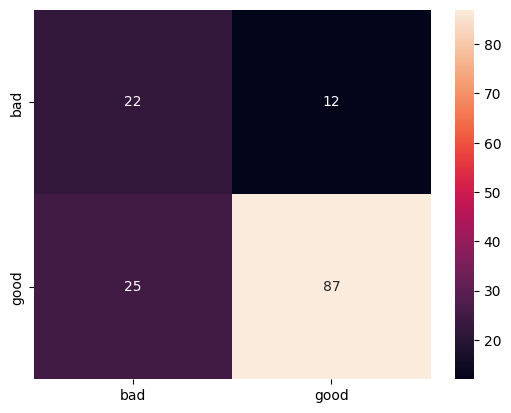

In [284]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', xticklabels=['bad','good'], yticklabels=['bad', 'good'])

In [285]:
precision_score = confusion[1,1] / np.sum(confusion[:,1])
print(f'''
Dari confusion matrix di atas, diperoleh:
- True Positive: {confusion[1,1]}
- True Negative: {confusion[0,0]}
- False Positive: {confusion[0,1]}
- False  Negative: {confusion[1,0]}
''')
print('Precision Score:', precision_score, end='\n\n')
print(f"Sehingga, dapat disimpulkan bahwa pada tahap pengujian ini, model terbaik ({best_model['Name']}) menghasilkan score precision sebesar {precision_score*100:.2f}%")



Dari confusion matrix di atas, diperoleh:
- True Positive: 87
- True Negative: 22
- False Positive: 12
- False  Negative: 25

Precision Score: 0.8787878787878788

Sehingga, dapat disimpulkan bahwa pada tahap pengujian ini, model terbaik (Gaussian Naive Bayes) menghasilkan score precision sebesar 87.88%
